# REGRESSION - ANALYSIS WITH XGB
raulvalerio@gmail.com

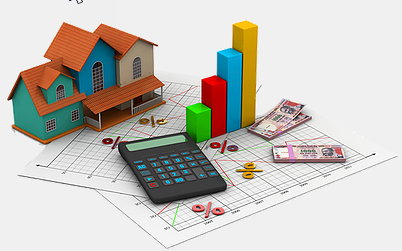

Photo Source: www.medium.com

## Real Estate valuation

Attribute Information:

* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Source: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [41]:
data= pd.read_csv("mydatasets/Real estate valuation data set.csv")

In [42]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
data.shape

(414, 8)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [45]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


###  Choosing features :  Feature Selection

In [46]:
data=data.drop(['X1 transaction date','No'],axis=1)

In [47]:
data.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [48]:
data.columns = ['House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']

In [49]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### Null variables and missing values

In [50]:
data.isna().sum()

House Age           0
Distance to MRT     0
Number Stores       0
Latitude            0
Longitude           0
House Price Unit    0
dtype: int64

### Select output and input variables

In [51]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

### Split train and test

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1) # 75 - 25 split   (test_size=0.25)

In [53]:
X_train.shape, X_test.shape

((310, 5), (104, 5))

### Chossing Regressor

In [54]:
model = XGBRegressor()

### Fitting model

In [55]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

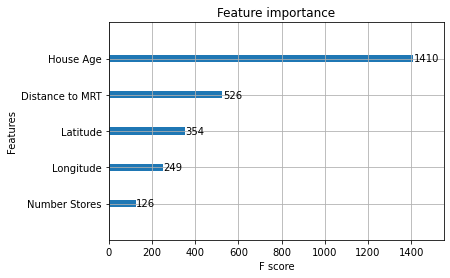

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

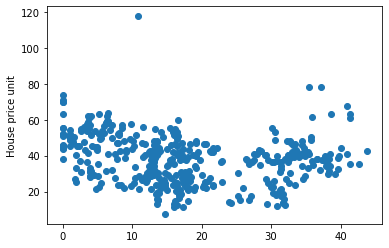

In [57]:
plt.scatter(data["House Age"], data["House Price Unit"])
plt.ylabel("House price unit")
plt.show()

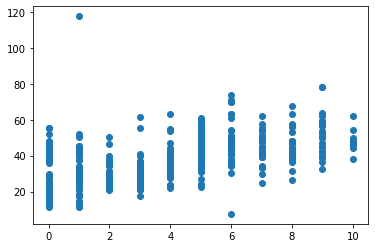

In [58]:
plt.scatter(data["Number Stores"], data["House Price Unit"])
plt.show()

### Predicting new values

In [59]:
predictions = model.predict(X_test)

In [61]:
predictions[0:10]

array([23.50063 , 47.643   , 26.308422, 12.965963, 94.14111 , 30.438053,
       27.1464  , 34.468307, 42.579712, 13.944125], dtype=float32)

In [247]:
X_test.iloc[0]

House Age            1.10000
Distance to MRT    193.58450
Number Stores        6.00000
Latitude            24.96571
Longitude          121.54089
Name: 102, dtype: float64

In [62]:
y_test.iloc[0]

27.3

## Model Error

#### Training MSE

In [63]:
pred_train = model.predict(X_train)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

In [65]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9915845035001386


In [66]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ?? 

1.5700161454442791


#### Testing MSE

In [67]:
model.score(X_test, y_test)  ## R^2

0.36918857985018205

In [68]:
print(r2_score(y_test, predictions))

0.36918857985018205


In [69]:
print(mean_squared_error(y_test, predictions))

111.38164226363993


### What to do ??

* Remove outliers from House Price Unit
* Add dates as year and month, day maybe?
* Change train - test split size   (test_size=0.33)
* Optimize hyperparameters
* Run Cross validation

## SECOND PART

In [3]:
data= pd.read_csv("mydatasets/Real estate valuation data set.csv")

In [4]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data=data.drop(['No'],axis=1)

In [6]:
data.columns = ['Date','House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']

### FEATURE ENGINEERING

In [7]:
type(data.Date[0])

numpy.float64

In [9]:
from datetime import datetime

data['date_time'] =  pd.to_datetime(data['Date'], format='%Y')

data['year'] = pd.DatetimeIndex(data['date_time']).year

data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012


In [10]:
import math
data['month'],data['year2'] =  data['Date'].apply(lambda x: math.modf(x)).str

<ipython-input-10-77d038ea69bc>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'],data['year2'] =  data['Date'].apply(lambda x: math.modf(x)).str


In [11]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,0.917,2012.0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,0.917,2012.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,0.583,2013.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,0.500,2013.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,0.833,2012.0


In [12]:
data['year2'] = ( data['year2']).astype(int)

In [13]:
data['month'] = data['month']*12

In [14]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.004,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.004,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.996,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.000,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.996,2012


In [15]:
data['day'],data['month'] =  data['month'].apply(lambda x: math.modf(x)).str

<ipython-input-15-a70e932b3ff6>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'],data['month'] =  data['month'].apply(lambda x: math.modf(x)).str


In [16]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.0,2012,0.004
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.0,2012,0.004
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.0,2013,0.996
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.0,2013,0.000
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.0,2012,0.996


In [17]:
data['month'] = ( data['month']).astype(int)

data['day'] = ( data['day']*30 + 1).astype(int)

In [18]:
data.head()

,Date,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,date_time,year,month,year2,day
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11,2012,1
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11,2012,1
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6,2013,30
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6,2013,1
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9,2012,30


### Variable selection

In [19]:
data = data.drop(['Date','date_time','year2'],axis=1)

In [20]:
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


### Outliers

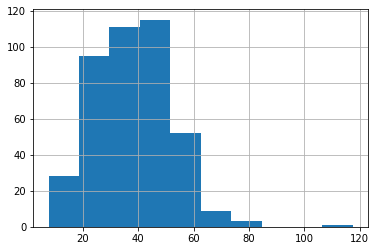

In [21]:
data['House Price Unit'].hist()

In [22]:
data = data[ data['House Price Unit']<90 ]

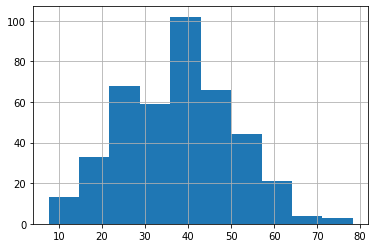

In [24]:
import matplotlib.pyplot as plt

data['House Price Unit'].hist()
plt.show()

#### Select variables

In [25]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

#### Split train and test

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [27]:
X_train.shape, X_test.shape

((309, 8), (104, 8))

### Regression Model

In [28]:
model = XGBRegressor()

In [29]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

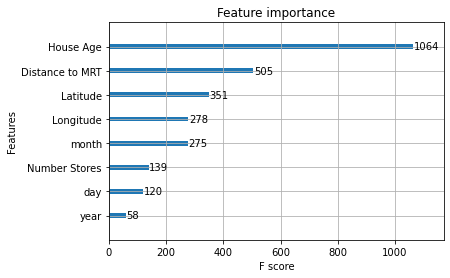

In [30]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

### Train performance

In [31]:
pred_train = model.predict(X_train)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

print(r2_score(y_train, pred_train))

0.9967961938754121


In [34]:
print(mean_squared_error(y_train, pred_train)) 

0.5431973293943203


### Test performance

In [35]:
predictions = model.predict(X_test)

In [36]:
print(r2_score(y_test, predictions))

0.7417751061473832


In [37]:
model.score(X_test, y_test)  # R^2

0.7417751061473832

In [38]:
print(mean_squared_error(y_test, predictions))

44.02845575253768


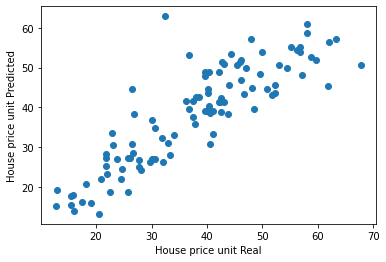

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel("House price unit Real")
plt.ylabel("House price unit Predicted")
plt.show()

In [ ]:
pip install pycaret

from pycaret.regression import *

exp_reg = setup(data, target='House Price Unit')